
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [6]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [7]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [96]:
df[:3]
df.columns

Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inf

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

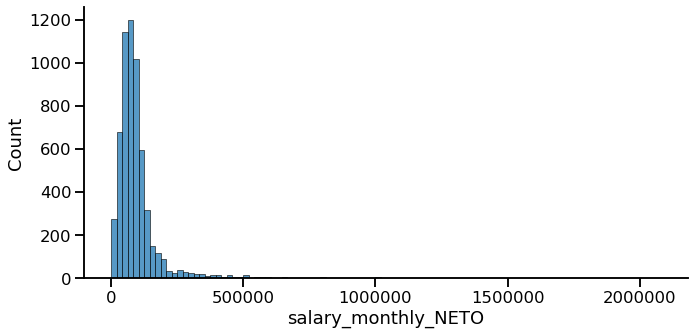

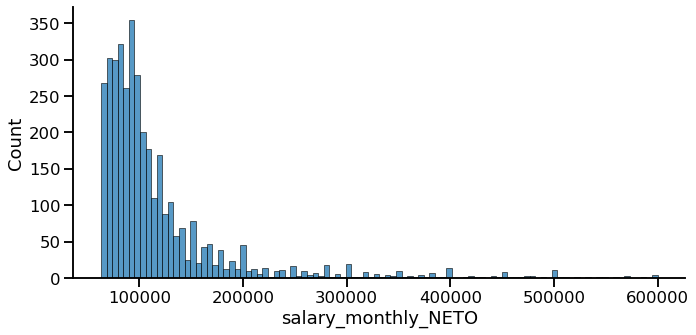

In [42]:
# 1 - Selección de columnas relevantes
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', "company_employee_number"]

# 2 - Selección de filas relevantes. Para ello elimino los sueldos por debajo de la canasta básica total 2020 ($63000)y los que 
#     se encuentran por arriba de 10 canastas básicas ($630.000). Es posible que los sueldos menores a $63mil sean partime.

salary='salary_monthly_NETO'

df_cleaned=  df[(df[salary] > 63000) & (df[salary] < 630000)]

seaborn.displot(df[salary], aspect=2, bins=100) 
## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')

seaborn.displot(df_cleaned[salary], aspect=2, bins=100) 
## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')


    




In [72]:
df.shape

(6095, 49)

In [52]:
df_cleaned.shape

(3707, 49)

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [43]:
df_cleaned.tools_programming_languages[:3]

2                                              Ninguno
3    Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
4               CSS, HTML, Javascript, SQL, TypeScript
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [47]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df_cleaned.loc[:, 'cured_programming_languages'] = df_cleaned.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_cleaned_lang = df_cleaned.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df_cleaned[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_cleaned_lang[:5]

C:\Users\Sebastian\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,programming_language,tools_programming_languages,salary_monthly_NETO,company_employee_number,cured_programming_languages
2,ninguno,Ninguno,127000.0,2001-5000,[ninguno]
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,501-1000,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,501-1000,"[bash/shell, c, css, html, java, javascript, p..."
3,css,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,501-1000,"[bash/shell, c, css, html, java, javascript, p..."
3,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,501-1000,"[bash/shell, c, css, html, java, javascript, p..."


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [111]:
language_count = df_cleaned_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:46]

,language,frequency
0,javascript,1519
1,sql,1309
2,html,1053
3,python,1031
4,java,995
5,bash/shell,698
6,css,690
7,.net,512
8,typescript,510
9,php,494


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [54]:
# En base a la lista previa, decido quedarme con los 5 lenguajes más populares 

interesting_languages = ["javascript", "sql", "html", "python", "java" ]
filtered_df_cleaned_lang = df_cleaned_lang[df_cleaned_lang.programming_language.isin(interesting_languages)]
filtered_df_cleaned_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,company_employee_number,cured_programming_languages
3,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,501-1000,"[bash/shell, c, css, html, java, javascript, p..."
3,java,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,501-1000,"[bash/shell, c, css, html, java, javascript, p..."
3,javascript,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,501-1000,"[bash/shell, c, css, html, java, javascript, p..."
3,python,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,501-1000,"[bash/shell, c, css, html, java, javascript, p..."
3,sql,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,501-1000,"[bash/shell, c, css, html, java, javascript, p..."


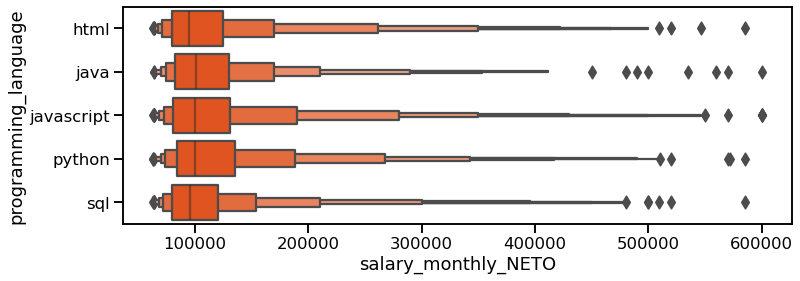

In [64]:
plt.figure(figsize=(12, 4))
seaborn.boxenplot(data=filtered_df_cleaned_lang, x=salary, y='programming_language',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

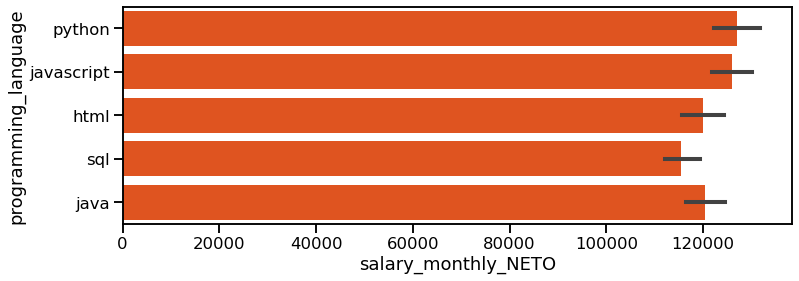

In [63]:
# No entiendo porque no me los ordena de menor a mayor, si le especifiqué ascending True
plt.figure(figsize=(12, 4))
seaborn.barplot(data=filtered_df_cleaned_lang.sort_values(by=[salary], ascending=True), x=salary, y='programming_language',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




In [88]:
# Para este ejercicio tomo la base de datos df_cleaned que ya tiene seleccionadas las filas de interés
# Para elegir las variables numéricas y categóricas, paso la función dtype para conocer el tipo de variable de c/columna
df_cleaned.dtypes

# Elijo 3 variables numéricas y 2 categóricas
numeric_columns = ["profile_age", "profile_years_experience", "salary_monthly_NETO"]
categorical_columns = ["company_employee_number", "company_main_activity"]

# Le paso una función describe a las columnas numéricas seleccionadas
df_cleaned[numeric_columns].describe()

,profile_age,profile_years_experience,salary_monthly_NETO
count,3707.000000,3707.000000,3707.000000
mean,34.188292,10.566927,118851.432568
std,11.236968,7.049565,72733.182560
min,19.000000,0.000000,63080.000000
25%,29.000000,5.000000,80000.000000
50%,33.000000,10.000000,97000.000000
75%,38.000000,15.000000,125000.000000
max,567.000000,115.000000,600000.000000


In [112]:
# Edito las variables que tienen valores incoherentes. Coloco como límite máximo de edad 80 y de experiencia 50

new_profile_age = df_cleaned["profile_age"][df_cleaned["profile_age"] < 80]
print(new_profile_age.describe())

new_experience = df_cleaned["profile_years_experience"][df_cleaned["profile_years_experience"] < 50]
print(new_experience.describe())

count    3706.000000
mean       34.044522
std         7.046973
min        19.000000
25%        29.000000
50%        33.000000
75%        38.000000
max        67.000000
Name: profile_age, dtype: float64
count    3706.000000
mean       10.538748
std         6.838518
min         0.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        44.000000
Name: profile_years_experience, dtype: float64


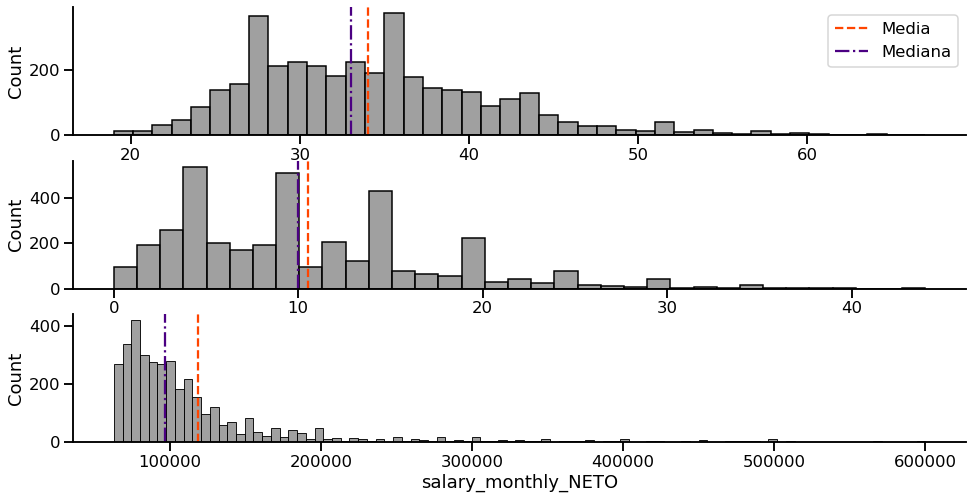

In [87]:
# Grafico las variables cuantitativas corregidas
fig, axes = plt.subplots(nrows=3, figsize=(16, 8))
seaborn.histplot(new_profile_age, ax=axes[0], color='gray')
axes[0].axvline(new_profile_age.mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(new_profile_age.median(), color='indigo',
            linestyle='-.', label='Mediana')

seaborn.histplot(new_experience, ax=axes[1], color='gray')
axes[1].axvline(new_experience.mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(new_experience.median(), color='indigo',
            linestyle='-.', label='Mediana')

seaborn.histplot(df_cleaned["salary_monthly_NETO"], ax=axes[2], color='gray')
axes[2].axvline(df_cleaned["salary_monthly_NETO"].mean(), color='orangered',
            linestyle='--', label='Media')
axes[2].axvline(df_cleaned["salary_monthly_NETO"].median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()
seaborn.despine() # No entiendo para que se agrega esto
# No sé cómo agregar la xlabel a los dos gráficos superiores

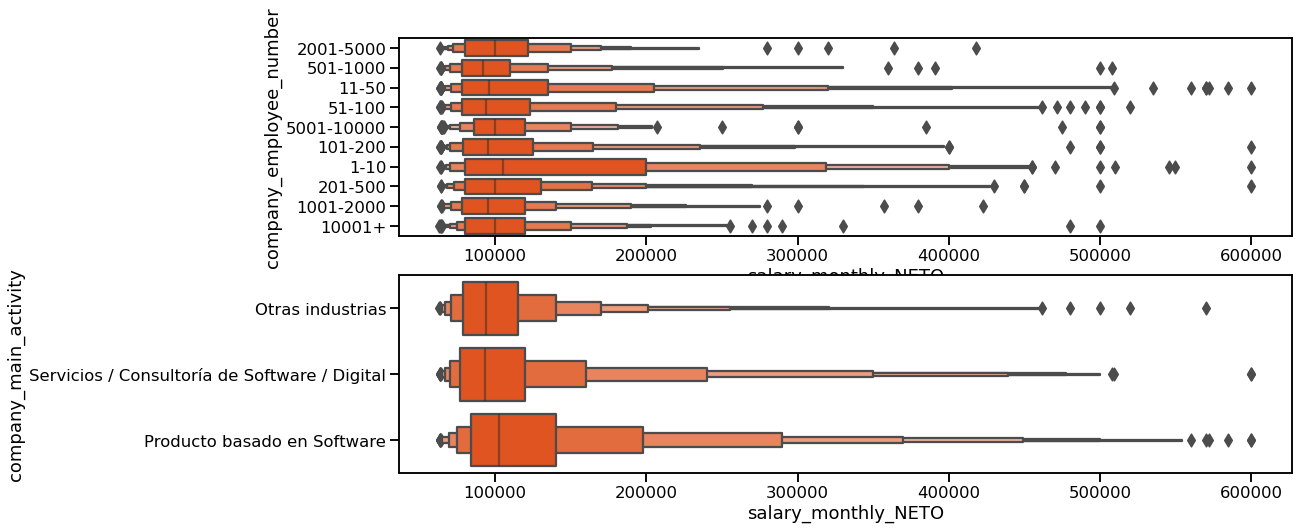

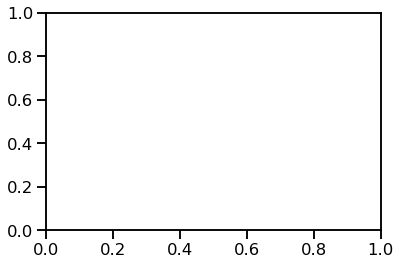

In [89]:
# Para analizar las categóricas utilizo primero la visualización
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))
plt.figure()
seaborn.boxenplot(data=df_cleaned, x=salary, y="company_employee_number",
                color='orangered', ax=axes[0])
seaborn.boxenplot(data=df_cleaned, x=salary, y="company_main_activity",
                color='orangered', ax=axes[1])
plt.ticklabel_format(style='plain', axis='x')
# Estaría bueno saber cómo hacer para que no queden encimadas las etiquetas del eje x
# No sé porque me queda el último gráfico vacío

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



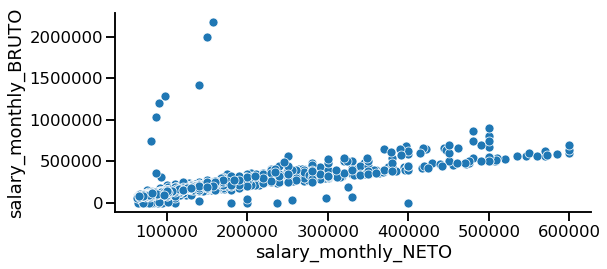

In [95]:
# Como no vimos el cálculo de correlación aún, solo utilizaría el análisis grafico para evaluar correlación
seaborn.pairplot(data= df_cleaned, y_vars='salary_monthly_BRUTO',x_vars='salary_monthly_NETO',
                 aspect=2, height=4)
plt.ticklabel_format(style='plain', axis='y')
# Se observa una correlación bastante alta por lo que me quedaría solo con la columna de salario neto que refleja el 
# lo que se percibe de bolsillo

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [103]:
df_cleaned.profile_studies_level.unique()

array(['Secundario', 'Posgrado', 'Universitario', 'Terciario',
       'Posdoctorado', 'Doctorado', 'Primario'], dtype=object)

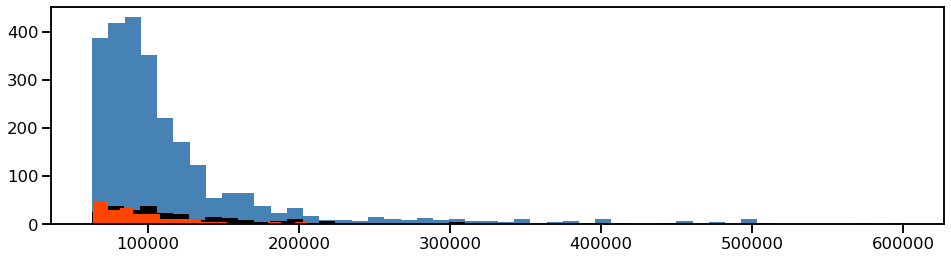

In [113]:
plt.figure(figsize=(16, 4))
df_Sec= df_cleaned[df_cleaned['profile_studies_level']=='Secundario']
df_Uni= df_cleaned[df_cleaned['profile_studies_level']=='Universitario']
df_Pos= df_cleaned[df_cleaned['profile_studies_level']=='Posgrado']

plt.hist(df_Uni[salary], color='steelblue', bins=50)
plt.hist(df_Pos[salary], color='black', bins=50)
plt.hist(df_Sec[salary], color='orangered', bins=50)
plt.show()


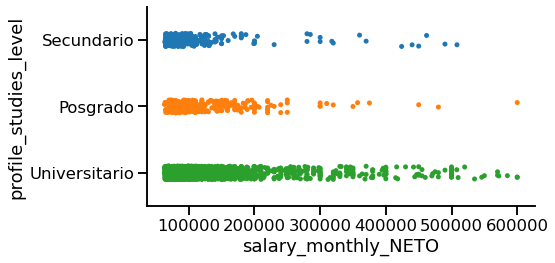

In [102]:
categ_interes = ["Secundario", "Universitario", "Posgrado"]
seaborn.catplot(data=df_cleaned[df_cleaned.profile_studies_level.isin(categ_interes)], y='profile_studies_level',
                x=salary, height=4, aspect=2)
# No comprendo porqué me da error cuando corro esta sentencia reemplazando catplot por boxenplot

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


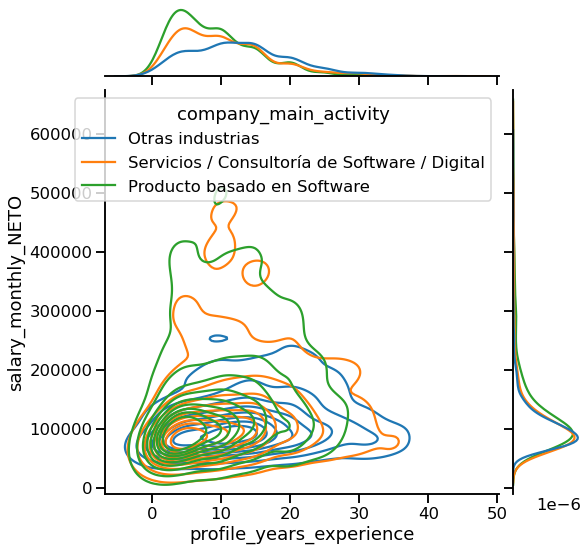

In [108]:
seaborn.jointplot(x=new_experience,
                  y=df_cleaned['salary_monthly_NETO'], hue=df_cleaned["company_main_activity"],
                  kind='kde', height=8)